In [1]:
import pandas as pd

In [8]:
df = pd.read_excel('/content/drive/Shareddrives/Spark! and Sustainable Purchasing/Department Mason spend.xlsx')
df = df.drop(columns=['Without\nPurchase Order', 'Unnamed: 19', 'Unnamed: 20']).dropna()

In [9]:
df

,ARAVO Vendor ID,Vendor,Vendor Name,Type of Business,PO Creation Date,Product P/N (Vendor),Shopper,Unit,Unit name,With \nPurchase Order,Total Invoice \nAmount,Total Paid,Disc. Amount,Total Invoice \nQty,upper part,match,Category,Description
0,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2016-01-06,GMT6505,TIARAT,ZBU_ORG_U102,ADMINISTRATIVE SERVICES,19.68,19.68,19.68,0.39,2,GMT6505,1071.0,Coffee,"C-66920349|5853096957|Tea K-Cups Sampler, Asso..."
1,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2016-01-06,NES35110BX,TIARAT,ZBU_ORG_U102,ADMINISTRATIVE SERVICES,8.94,8.94,8.94,0.18,3,NES35110BX,1223.0,Coffee,"Original Liquid Coffee Creamer, 0.38 oz. Singl..."
2,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2016-01-11,GMT4050,MIKEJD,ZBU_ORG_U151,INFORMATION SERVICES & TECHNOLOGY,10.32,10.32,10.32,0.21,1,GMT4050,1017.0,Coffee,"Newman's Special Blend K-Cup Pods, 24/BX"
3,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2016-01-11,ITD102042,MLMORRIS,ZBU_ORG_U151,INFORMATION SERVICES & TECHNOLOGY,28.52,28.52,28.52,0.57,4,ITD102042,1260.0,Coffee,"Half AND Half Liquid Coffee Creamer, 0.3 oz. S..."
4,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2016-01-12,HEWC9731A,AMACKIN,ZBU_ORG_U151,INFORMATION SERVICES & TECHNOLOGY,195.57,195.57,195.57,0.00,1,HEWC9731A,590.0,Toner,"C-63961931|5840488845|645A, (C9731A) Cyan Orig..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61047,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2020-06-04,GMT6003,ADASILVA,ZBU_ORG_U186,CRC FACILITIES MANAGEMENT & PLANNING,43.52,43.52,43.52,0.00,4,GMT6003,980.0,Coffee,"Colombian Coffee K-Cup Pods, 24/BX"
61048,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2020-06-04,GMT6520,ADASILVA,ZBU_ORG_U186,CRC FACILITIES MANAGEMENT & PLANNING,43.52,43.52,43.52,0.00,4,GMT6520,1012.0,Coffee,"Breakfast Blend Coffee K-Cup Pods, 24/BX"
61049,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2020-06-04,GMT6570,ADASILVA,ZBU_ORG_U186,CRC FACILITIES MANAGEMENT & PLANNING,43.52,43.52,43.52,0.00,4,GMT6570,1004.0,Coffee,"Our Blend Coffee K-Cup Pods, 24/BX"
61050,10572031.0,10000800.0,WB Mason Company,OFFICE SUPPLIES & COMMERCIAL S,2020-06-04,GMT6663,ADASILVA,ZBU_ORG_U186,CRC FACILITIES MANAGEMENT & PLANNING,65.28,65.28,65.28,0.00,6,GMT6663,976.0,Coffee,"Nantucket Blend Coffee K-Cup Pods, 24/BX, 4 BX/CT"


In [10]:
df.describe()

,ARAVO Vendor ID,Vendor,With \nPurchase Order,Total Invoice \nAmount,Total Paid,Disc. Amount,match
count,61049.0,61049.0,61049.000000,61049.000000,61049.000000,61049.000000,61049.000000
mean,10572031.0,10000800.0,50.183581,50.183581,50.180256,0.754073,896.264214
std,0.0,0.0,84.050265,84.050265,84.053059,1.468556,355.141286
min,10572031.0,10000800.0,-377.820000,-377.820000,-377.820000,-7.890000,1.000000
25%,10572031.0,10000800.0,10.880000,10.880000,10.880000,0.070000,930.000000
50%,10572031.0,10000800.0,22.540000,22.540000,22.540000,0.290000,1004.000000
75%,10572031.0,10000800.0,55.920000,55.920000,55.920000,0.830000,1079.000000
max,10572031.0,10000800.0,3655.840000,3655.840000,3655.840000,73.120000,1546.000000


In [11]:
df['Unit name'].unique()

array(['ADMINISTRATIVE SERVICES', 'INFORMATION SERVICES & TECHNOLOGY',
       'SCHOOL OF MEDICINE (BUSM)', 'THE BU ACADEMY',
       'GENERAL ED SUPPORT & ACADEMIC INITIATIVS',
       'BUMC FACILITIES MANAGEMENT',
       'HENRY M GOLDMAN SCH OF DENTAL MED (GSDM)',
       'PHYSICAL DEVELOPMENT PROGRAMS & ATHLETIC', 'PROVOST',
       'QUESTROM SCHOOL OF BUSINESS (QST)',
       'COLLEGE OF ARTS AND SCIS (CAS)', 'CENTRAL ADMINISTRATION',
       'GLOBAL PROGRAMS', 'MET & EXTENDED EDUCATION ADMINISTRATION',
       'VICE PRESIDENT FINANCE', 'COLLEGE OF ENGINEERING (ENG)',
       'DEVELOPMENT & ALUMNI RELATIONS', 'METROPOLITAN COLLEGE (MET)',
       'NATL EMERGING INFECTIOUS DIS LAB (NEIDL)',
       'ENROLLMENT & STUDENT AFFAIRS', 'SDM DENTAL CLINICS',
       'SARGENT COLLEGE OF HEALTH & REHAB. SCI.',
       'SCHOOL OF PUBLIC HEALTH (SPH)', 'UNIV PROFESSORS-HONORS COLLEGE',
       'CRC FACILITIES MANAGEMENT & PLANNING',
       'COLLEGE OF FINE ARTS (CFA)', 'GRADUATE MEDICAL SCIENCES (GMS)',
   

In [12]:
# Total requests for different apartment
df['Unit name'].value_counts()

SCHOOL OF MEDICINE (BUSM)                   6616
HENRY M GOLDMAN SCH OF DENTAL MED (GSDM)    5722
COLLEGE OF ARTS AND SCIS (CAS)              5421
GENERAL ED SUPPORT & ACADEMIC INITIATIVS    3611
SCHOOL OF PUBLIC HEALTH (SPH)               2538
ADMINISTRATIVE SERVICES                     2200
INFORMATION SERVICES & TECHNOLOGY           1973
METROPOLITAN COLLEGE (MET)                  1757
ENROLLMENT & STUDENT AFFAIRS                1590
SCHOOL OF LAW (LAW)                         1572
COLLEGE OF ENGINEERING (ENG)                1533
CRC FACILITIES MANAGEMENT & PLANNING        1521
SARGENT COLLEGE OF HEALTH & REHAB. SCI.     1511
VICE PRESIDENT FINANCE                      1506
ACADEMIC INSTITUTES & CENTERS               1450
QUESTROM SCHOOL OF BUSINESS (QST)           1349
PROVOST                                     1299
PHYSICAL DEVELOPMENT PROGRAMS & ATHLETIC    1262
GRADUATE MEDICAL SCIENCES (GMS)             1101
COLLEGE OF FINE ARTS (CFA)                  1095
MEDICAL CAMPUS ADMIN

In [13]:
coffee_req, toner_req = df[df.Category=='Coffee'], df[df.Category=='Toner']

In [14]:
coffee_req['Unit name'].value_counts()

HENRY M GOLDMAN SCH OF DENTAL MED (GSDM)    4063
SCHOOL OF MEDICINE (BUSM)                   3722
COLLEGE OF ARTS AND SCIS (CAS)              3366
GENERAL ED SUPPORT & ACADEMIC INITIATIVS    2696
ADMINISTRATIVE SERVICES                     2014
INFORMATION SERVICES & TECHNOLOGY           1812
SCHOOL OF PUBLIC HEALTH (SPH)               1769
ENROLLMENT & STUDENT AFFAIRS                1558
METROPOLITAN COLLEGE (MET)                  1512
VICE PRESIDENT FINANCE                      1385
CRC FACILITIES MANAGEMENT & PLANNING        1360
ACADEMIC INSTITUTES & CENTERS               1247
PROVOST                                     1161
SCHOOL OF LAW (LAW)                         1154
SARGENT COLLEGE OF HEALTH & REHAB. SCI.     1107
PHYSICAL DEVELOPMENT PROGRAMS & ATHLETIC    1042
QUESTROM SCHOOL OF BUSINESS (QST)            984
COLLEGE OF ENGINEERING (ENG)                 956
GRADUATE MEDICAL SCIENCES (GMS)              916
UNIV PROFESSORS-HONORS COLLEGE               805
MEDICAL CAMPUS ADMIN

In [15]:
toner_req['Unit name'].value_counts()

SCHOOL OF MEDICINE (BUSM)                   2894
COLLEGE OF ARTS AND SCIS (CAS)              2055
HENRY M GOLDMAN SCH OF DENTAL MED (GSDM)    1659
GENERAL ED SUPPORT & ACADEMIC INITIATIVS     915
SCHOOL OF PUBLIC HEALTH (SPH)                769
COLLEGE OF ENGINEERING (ENG)                 577
COLLEGE OF FINE ARTS (CFA)                   430
SCHOOL OF LAW (LAW)                          418
SARGENT COLLEGE OF HEALTH & REHAB. SCI.      404
QUESTROM SCHOOL OF BUSINESS (QST)            365
GLOBAL PROGRAMS                              294
WHEELOCK COLLEGE OF EDUC & HUMAN DEVELOP     293
SCHOOL OF SOCIAL WORK (SSW)                  281
METROPOLITAN COLLEGE (MET)                   245
MEDICAL CAMPUS ADMINISTRATION (BUMC)         244
WBUR RADIO                                   239
PHYSICAL DEVELOPMENT PROGRAMS & ATHLETIC     220
ACADEMIC INSTITUTES & CENTERS                203
ADMINISTRATIVE SERVICES                      186
GRADUATE MEDICAL SCIENCES (GMS)              185
CRC FACILITIES MANAG

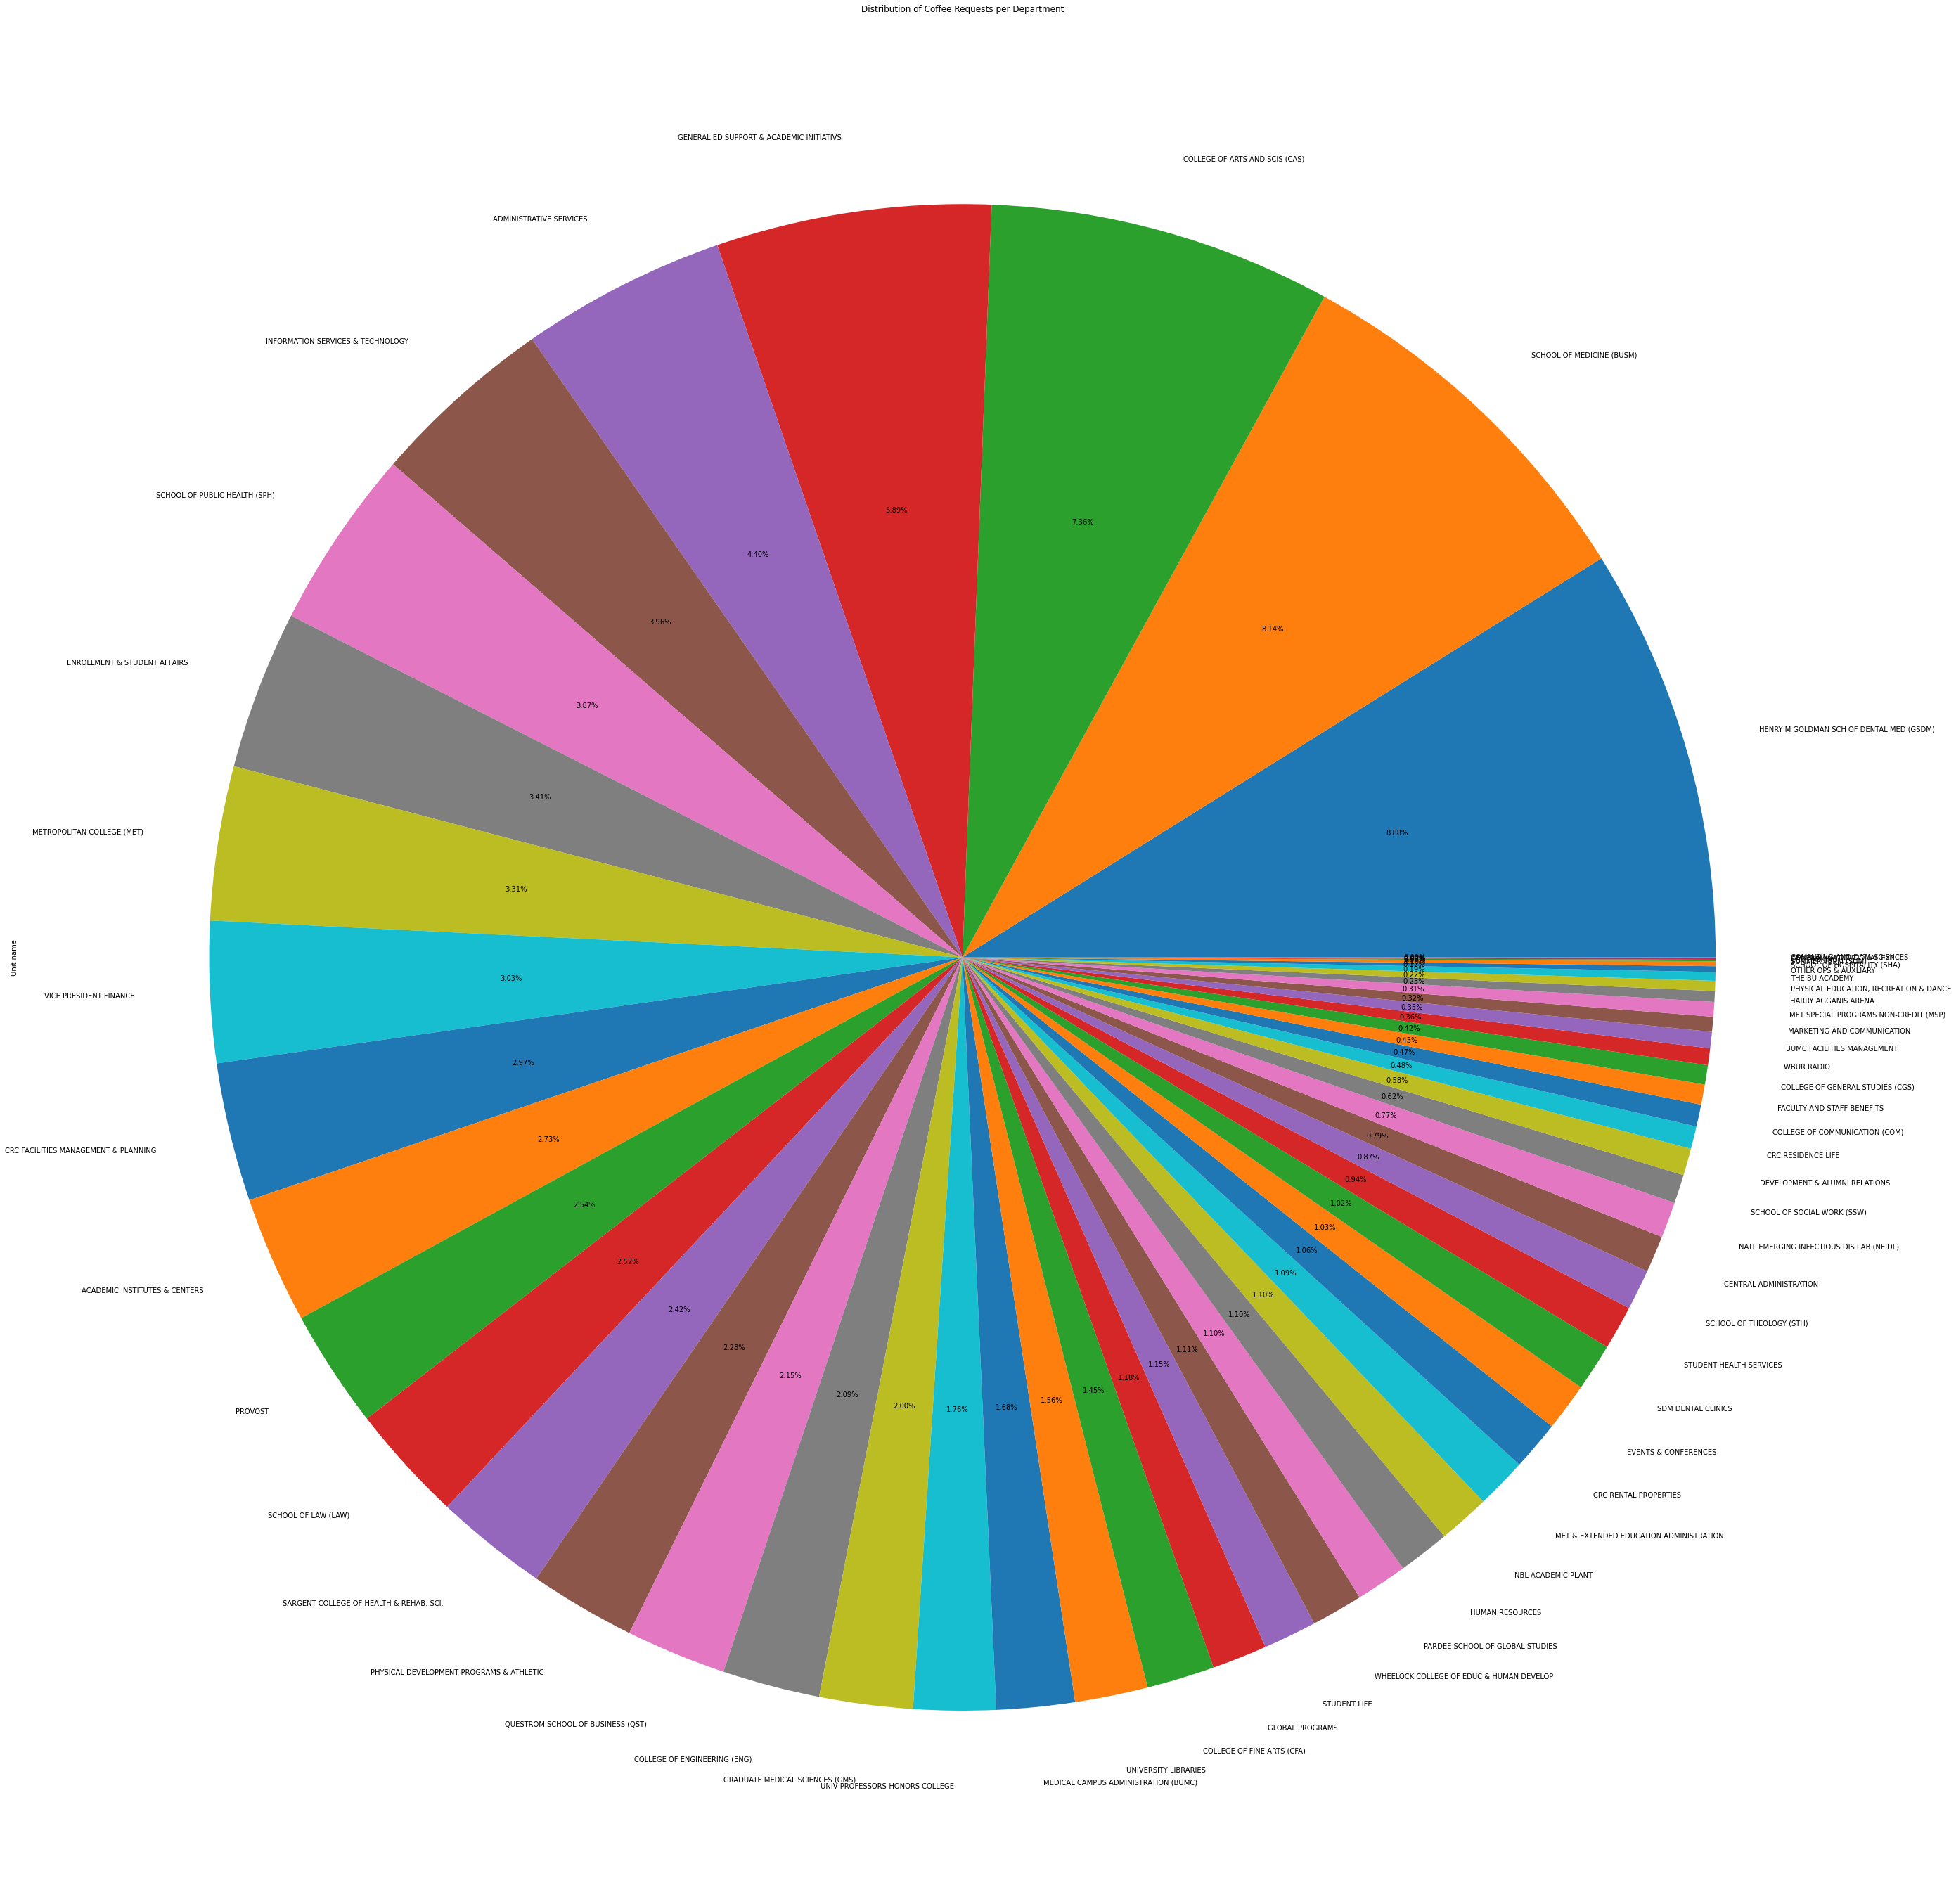

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

coffee_req['Unit name'].value_counts().plot.pie(figsize=(48,72),title="Distribution of Coffee Requests per Department",autopct='%1.2f%%')
plt.gca().set_aspect('equal')

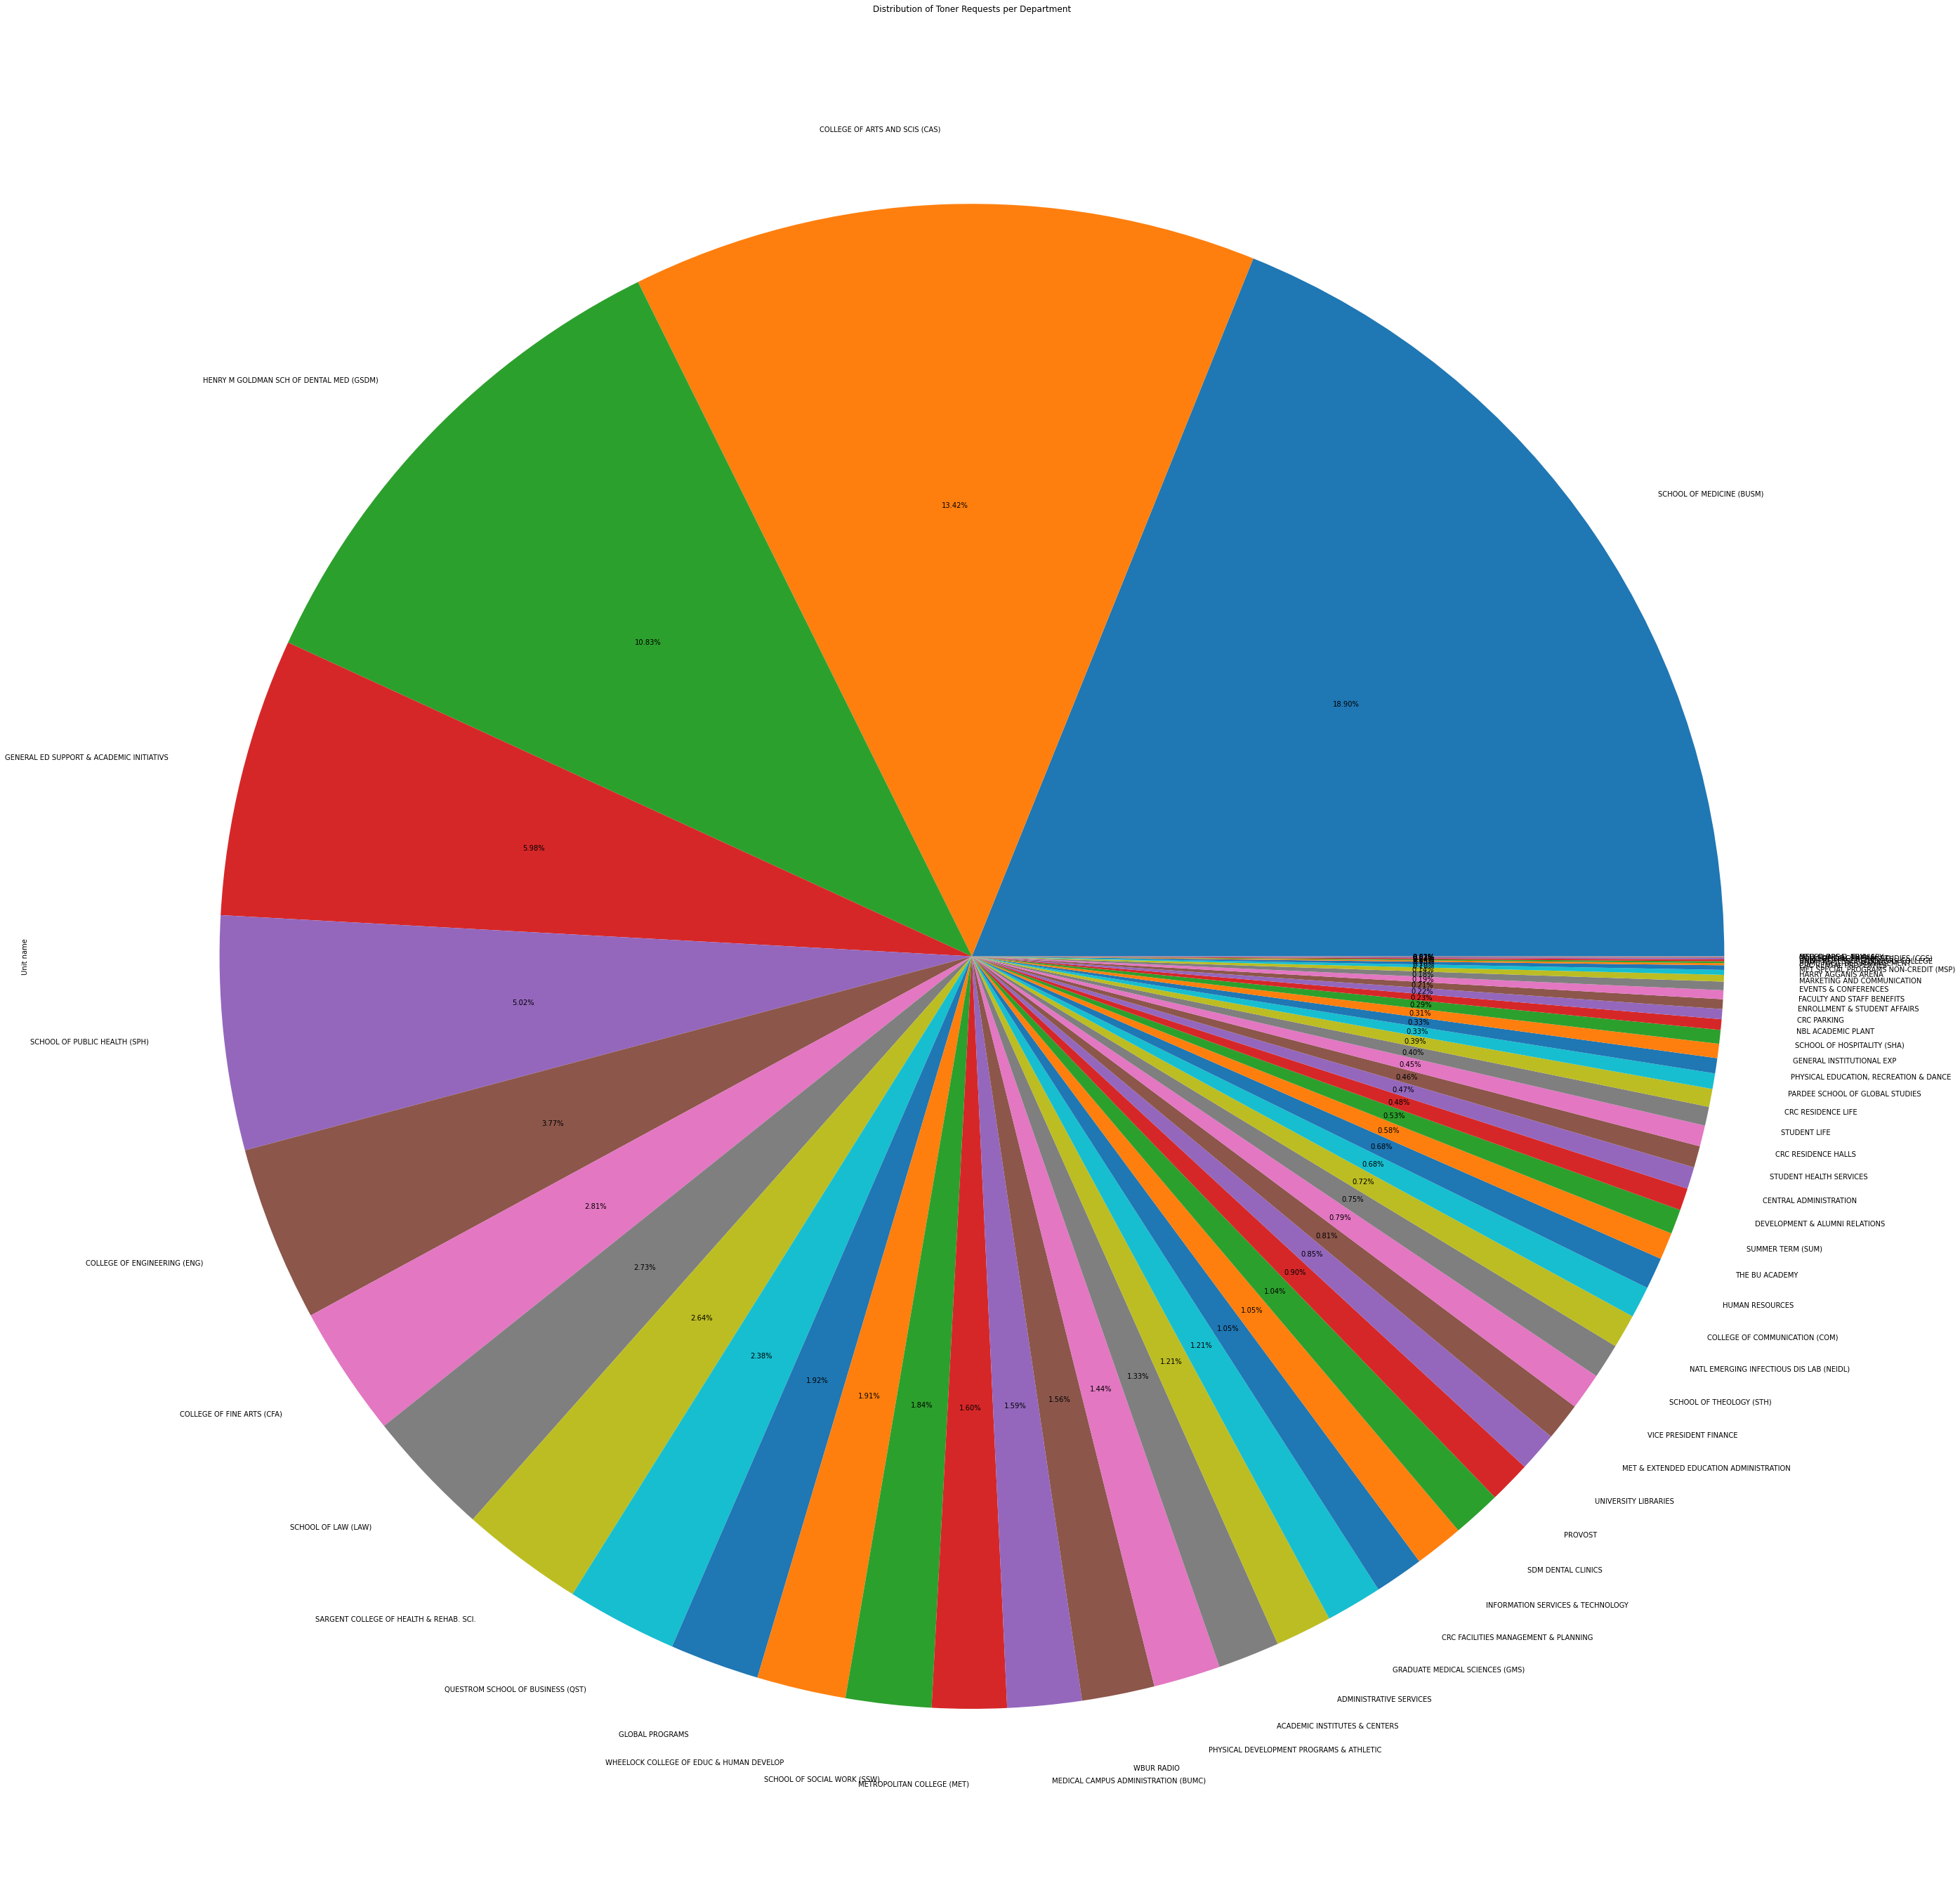

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

toner_req['Unit name'].value_counts().plot.pie(figsize=(48,72),title="Distribution of Toner Requests per Department",autopct='%1.2f%%')
plt.gca().set_aspect('equal')